# App Name: ArriveCAN

In [1]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews_all

# Collect app reviews from Google Play by providing package name of app

In [3]:
us_reviews = reviews_all(
    'ca.gc.cbsa.coronavirus',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
df_busu = pd.DataFrame(np.array(us_reviews),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
#len(df_busu)
#df_busu.head()

In [5]:
app_reviewsnew_df = pd.DataFrame(df_busu)

del app_reviewsnew_df["userImage"]
del app_reviewsnew_df["reviewId"]
del app_reviewsnew_df["thumbsUpCount"]
del app_reviewsnew_df["reviewCreatedVersion"]
del app_reviewsnew_df["at"]
del app_reviewsnew_df["replyContent"]
#del app_reviewsnew_df["sortOrder"]
del app_reviewsnew_df["repliedAt"]

app_reviewsnew_df.rename(columns = {'content' : 'Review', 'score' : 'Rating'}, inplace = True)

app_reviewsnew_df.head(9999)


,userName,Review,Rating
0,Pui Cheng,Scan works only sometime.,3
1,nein,I hate it,1
2,Leigh Collins,easy to use,5
3,David Williams,stupid app,1
4,Liz Koley,very easy to use,5
...,...,...,...
9866,Ev Mckay,What a useless app and waste if time. I though...,1
9867,Adriaan de Hoog,What a useless time wasting app,1
9868,Brian Croft,It doesn't bring up any land border crossings ...,1
9869,A Google user,Not working properly. I am coming in to Toront...,1


## Create an output file of reviews collected 

In [6]:
app_reviewsnew_df.to_csv('ca.gc.cbsa.coronavirus.csv', index=None, header=True)

In [7]:
pip install num2words

Note: you may need to restart the kernel to use updated packages.


## Read the input file of reviews collected 

In [8]:
pd.set_option('display.max_colwidth',800)
pd.options.mode.chained_assignment = None  # default='warn'
reviews = pd.read_csv("ca.gc.cbsa.coronavirus.csv", encoding="utf8")

In [9]:
reviews.head(9999)

,userName,Review,Rating
0,Pui Cheng,Scan works only sometime.,3
1,nein,I hate it,1
2,Leigh Collins,easy to use,5
3,David Williams,stupid app,1
4,Liz Koley,very easy to use,5
...,...,...,...
9866,Ev Mckay,What a useless app and waste if time. I thought I be a responsible citizen returning home and downloaded this app from a link on the government page. Westjet is only doing repatriation flights to Toronto yet the app won't select that airport. How frickin stupid can that be?,1
9867,Adriaan de Hoog,What a useless time wasting app,1
9868,Brian Croft,"It doesn't bring up any land border crossings except one...Douglas Passenger? Waste of time. The travel information says to use this or a ""form"" but no link to print the form. So what now...wait for an officer at the booth to hand it to you and then sit there filling it out? Please update the app.",1
9869,A Google user,"Not working properly. I am coming in to Toronto airport but the app keeps defaulting to Vancouver airport. I installed and reinstalled a few times but same problem. I type in Toronto airport, Pearson, then click on next and nothing happens. I have an Android phone and it has more than enough room for the app.",1


In [10]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Pre-processing of reviews

In [11]:
# Find floats
reviews['Review'].apply(lambda x:isinstance(x, float))

# Make all strings
reviews['Review']=reviews['Review'].apply(str)

import string
#print(string.punctuation)

def remove_punctuation(text):
    text_nopunct = ''.join([c for c in text if c not in string.punctuation])
    return text_nopunct

import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_special_chars(text):
    return(re.sub(r"\W+|_", " ", text)) 

import re
from num2words import num2words

# function to convert numbers to words
def num_to_words(text):
    
# splitting text into words with space
    after_spliting = text.split()

    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])

    # joining list into string with space
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words

def remove_extra_spaces(text):

 space_pattern = r'\s+'
 without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
 return without_space

def lower_case_convertion(text):

    lower_text = text.lower()
    return lower_text

from nltk.corpus import stopwords
from nltk import word_tokenize
all_stopwords  = set(stopwords.words('english'))

def remove_stopwords(text):

    text_without_sw = []
    # tokenization
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        # checking word is stopword or not
        if word not in all_stopwords:
            text_without_sw.append(word)

    # joining all tokens after removing stop words
    without_sw = ' '.join(text_without_sw)
    return without_sw


from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lemmatization(text):
    # word tokenization
    tokens = word_tokenize(text)

    for index in range(len(tokens)):
     # lemma word
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens) 

In [12]:
for ind in reviews.index:
    reviews['Review'][ind]=remove_punctuation(reviews['Review'][ind])    
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_emoji(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_special_chars(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=num_to_words(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_extra_spaces(reviews['Review'][ind])
for ind in reviews.index:
     reviews['Review'][ind]=lower_case_convertion(reviews['Review'][ind])   
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_stopwords(reviews['Review'][ind])  
        
for ind in reviews.index:
     reviews['Review'][ind]=lemmatization(reviews['Review'][ind])  
        
reviews.head(15)

,userName,Review,Rating
0,Pui Cheng,scan work sometime,3
1,nein,hate,1
2,Leigh Collins,easy use,5
3,David Williams,stupid app,1
4,Liz Koley,easy use,5
5,brad sledz,piss trudope b unnecessary costly damaging canadian economy ashamed,1
6,Lynda,lengthy cant itsooner three day travel youll need passport vaccinationimmunization record test result immunized take photo phone youve got hand app work great save time border u citizen ill entering canada brief vacation august two thousand twenty-two,5
7,John P,ridiculous unnecessary collection information info collected airport,1
8,Tim Sullivan,canada way stemming flow american poison crazy dems kicking police lifetime rule city abusing black wacky climate control name thats putin threw hand decided go alone world china right,1
9,Chris Allen,seven thousand thirty doesnt work v work,1


## Sentiment Analysis using Vader

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gilla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
app1_sentiment_vader = reviews[["Review"]]
app1_sentiment_vader['scores'] = app1_sentiment_vader['Review'].apply(lambda review: sid.polarity_scores(review))
app1_sentiment_vader.head(9999)

,Review,scores
0,scan work sometime,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,hate,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}"
2,easy use,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}"
3,stupid app,"{'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.5267}"
4,easy use,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}"
...,...,...
9866,useless app waste time thought responsible citizen returning home downloaded app link government page westjet repatriation flight toronto yet app wont select airport frickin stupid,"{'neg': 0.285, 'neu': 0.644, 'pos': 0.071, 'compound': -0.7902}"
9867,useless time wasting app,"{'neg': 0.733, 'neu': 0.267, 'pos': 0.0, 'compound': -0.6705}"
9868,doesnt bring land border crossing except onedouglas passenger waste time travel information say use form link print form nowwait officer booth hand sit filling please update app,"{'neg': 0.087, 'neu': 0.743, 'pos': 0.17, 'compound': 0.4019}"
9869,working properly coming toronto airport app keep defaulting vancouver airport installed reinstalled time problem type toronto airport pearson click next nothing happens android phone enough room app,"{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'compound': -0.4019}"


In [15]:
#Now will call out compound which is a polarity as a separate column and all values greater than zeroes will be considered 
#a positive review and all values less than zero would be considered as a negative review.
app1_sentiment_vader['Polarity']  = app1_sentiment_vader['scores'].apply(lambda score_dict: score_dict['compound'])
app1_sentiment_nvader = app1_sentiment_vader[["Review","Polarity"]]

In [16]:
app1_sentiment_nvader['Sentiment_Type']=''
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity>0,'Sentiment_Type']='POSITIVE'
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity==0,'Sentiment_Type']='NEUTRAL'
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity<0,'Sentiment_Type']='NEGATIVE'
app1_sentiment_comparison = app1_sentiment_nvader[["Review"]]
app1_sentiment_comparison['polarity']= app1_sentiment_nvader["Polarity"]
app1_sentiment_comparison['Sentiment_Type']= app1_sentiment_nvader["Sentiment_Type"]

# Table showing Polarity and Sentiment type using Vader Sentiment Analysis

In [17]:
app1_sentiment_comparison.head(9999)

,Review,polarity,Sentiment_Type
0,scan work sometime,0.0000,NEUTRAL
1,hate,-0.5719,NEGATIVE
2,easy use,0.4404,POSITIVE
3,stupid app,-0.5267,NEGATIVE
4,easy use,0.4404,POSITIVE
...,...,...,...
9866,useless app waste time thought responsible citizen returning home downloaded app link government page westjet repatriation flight toronto yet app wont select airport frickin stupid,-0.7902,NEGATIVE
9867,useless time wasting app,-0.6705,NEGATIVE
9868,doesnt bring land border crossing except onedouglas passenger waste time travel information say use form link print form nowwait officer booth hand sit filling please update app,0.4019,POSITIVE
9869,working properly coming toronto airport app keep defaulting vancouver airport installed reinstalled time problem type toronto airport pearson click next nothing happens android phone enough room app,-0.4019,NEGATIVE


# Count of positive, negative, and neutral reviews using Vader Sentiment Analysis 

In [18]:
app1_sentiment_nvader['Sentiment_Type'].value_counts()

POSITIVE    5105
NEGATIVE    2629
NEUTRAL     2137
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Vader Sentiment Analysis'}>

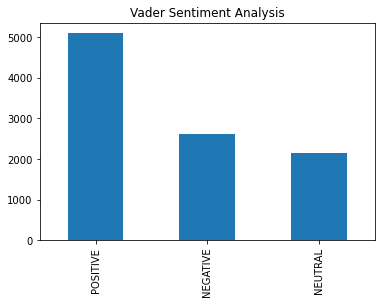

In [19]:
app1_sentiment_nvader.Sentiment_Type.value_counts().plot(kind='bar',title="Vader Sentiment Analysis")

## Sentiment Analysis using Textblob

In [20]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [21]:
from textblob import TextBlob

In [22]:
app1_sentiment = reviews[["Review"]]
polar=[]
for ind in app1_sentiment.index:
        sentence = app1_sentiment['Review'][ind]
        blob = TextBlob(sentence)
        blob.sentiment
        print(blob.sentiment)
        polar.append(blob.sentiment.polarity)
        
app1_sentiment["Polarity"]=polar

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.7999999999999999, subjectivity=1.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.4, subjectivity=0.9)
Sentiment(polarity=0.10000000000000002, subjectivity=0.6944444444444445)
Sentiment(polarity=-0.3666666666666667, subjectivity=0.95)
Sentiment(polarity=0.003809523809523818, subjectivity=0.5738095238095238)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.02500000000000001, subjectivity=0.2625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.26666666666666666, subjectivity=0.5666666666666667)
Sentiment(polarity=0.16666666666666666, subjectivity=0.5119047619047619)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)


Sentiment(polarity=0.2, subjectivity=0.6)
Sentiment(polarity=0.5361111111111111, subjectivity=0.6527777777777778)
Sentiment(polarity=-0.2, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.3125, subjectivity=0.75)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.07291666666666669, subjectivity=0.5625)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=-0.06, subjectivity=0.5066666666666666)
Sentiment(polarity=0.375, sub

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.225, subjectivity=0.6194444444444445)
Sentiment(polarity=-0.3333333333333333, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.37777777777777777, subjectivity=0.7666666666666666)
Sentiment(polarity=0.17777777777777778, subjectivity=0.41111111111111115)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22499999999999998, subjectivity=0.4527777777777778)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=-0.05, subjectivity=0.2)
Sentiment(polarity=-0.07291666666666669, subjectivity=0.5729166666666666)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.7999999999999999, subjectivity=1.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.16666666666666666)
Sentiment(polarity=0.325, subjectivity=0.75)
Sentiment(polarity=-0.2, subject

Sentiment(polarity=-0.05, subjectivity=0.2)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.175, subjectivity=0.775)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.3, subjectivity=0.638888888888889)
Sentiment(polarity=0.19999999999999998, subjectivity=0.7833333333333333)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3, subjectivity=0.3)
Sentiment(polarity=0.21666666666666667, subjectivity=0.6666666666666667)
Sentiment(polarity=-0.85, subjectivity=0.95)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.325, subjectivity=0.513888888888889)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.45, su

Sentiment(polarity=0.09659090909090909, subjectivity=0.45113636363636367)
Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.14666666666666667, subjectivity=0.5747619047619048)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.21666666666666667, subjectivity=0.5952380952380952)
Sentiment(polarity=0.35, subjectivity=0.6916666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=-0.2, subjectivity=0.15000000000000002)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.5, subjectivity=0.475)
Sentiment(polarity=0.12142857142857146, subjectivity=0.5531746031746032)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.31666666666666665, subjectivity=0.7166666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2, subjectivity=0.3)
Sentiment(polarit

Sentiment(polarity=-0.26666666666666666, subjectivity=0.6277777777777777)
Sentiment(polarity=-0.075, subjectivity=0.19999999999999998)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=-0.1, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.06818181818181818, subjectivity=0.4378787878787879)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.35416666666666663, subjectivity=0.4375)
Sentiment(polarity=-0.35714285714285715, subjectivity=0.42857142857142855)
Sentiment(polarity=0.22500000000000003, subjectivity=0.55)
Sentiment(polarity=-0.3333333333333333, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13, subjectivity=0.42000000000000004)
Sentiment(polarity=0.2777777777777778, subjectivity=0.6968253968253969)
Sentiment(polarity=0.7166666666666667, subjectivity=0.9166666666666667)
Sentiment(polarity=0.0, subjectivity=0.35714285714285715)
Sentiment(polarity=-0.5, subjecti

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.4041666666666667, subjectivity=0.6041666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2916666666666667, subjectivity=0.5416666666666666)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.14444444444444446, subjectivity=0.48571428571428577)
Sentiment(polarity=0.5666666666666667, subjectivity=0.7166666666666668)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.7999999999999999, subjectivity=1.0)
Sentiment(polarity=-0.7999999999999999, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
Sentiment(polarity=0.0, subjectivity=0.

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4, subjectivity=0.6)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=-0.25, subjectivity=0.15000000000000002)
Sentiment(polarity=0.4041666666666667, subjectivity=0.6041666666666667)
Sentiment(polarity=0.3833333333333333, subjectivity=0.75)
Sentiment(polarity=-0.32708333333333334, subjectivity=0.6157738095238096)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.37083333333333335, subjectivity=0.7041666666666667)
Sentiment(polarity=-0.3, subjectivity=0.4)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.2006060606060606, subjectivity=0.3509090909090909)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
S

Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.26666666666666666, subjectivity=0.6166666666666667)
Sentiment(polarity=0.6875, subjectivity=0.4)
Sentiment(polarity=0.375, subjectivity=0.5)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.16666666666666669, subjectivity=0.3958333333333333)
Sentiment(polarity=-0.5, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5166666666666666, subjectivity=0.9166666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.11666666666666665, subjectivity=0.5777777777777778)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.6, subjectivity=0.55)
Sentiment(polarity=-0.21, subjec

Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.04583333333333334, subjectivity=0.4708333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.34, subjectivity=0.6)
Sentiment(polarity=-0.425, subjectivity=0.7)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.55, subjectivity=0.65)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=-0.30000000000000004, subjectivity=0.45)
Sentiment(polarity=-0.10833333333333335, subjectivity=0.35)
Sentiment(polarity=0.5166666666666666, subjectivity=0.9166666666666667)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.5535714285714286)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(pola

Sentiment(polarity=-0.022727272727272735, subjectivity=0.5909090909090909)
Sentiment(polarity=-0.1875, subjectivity=0.5)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=-0.15000000000000002, subjectivity=0.65)
Sentiment(polarity=0.3527777777777778, subjectivity=0.7361111111111112)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=-0.09444444444444444, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.42500000000000004, subjectivity=0.65)
Sentiment(polarity=-0.10000000000000003, subjectivity=0.9)
Sentiment(polarity=0.5166666666666666, subjectivity=0.9166666666666667)
Sentiment(polarity=-0.275, subjectivity=0.6166666666666667)
Sentiment(polarity=0.3833333333333333, subjectivity=0.75)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.166666

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.29999999999999993)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.5)
Sentiment(polarity=0.22500000000000006, subjectivity=0.6791666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.38055555555555554, subjectivity=0.6111111111111112)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=-0.6, subjectivity=0.9)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.4666666666666666)
Sentiment(polarity=0.

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.1, subjectivity=0.3666666666666667)
Sentiment(polarity=-0.4, subjectivity=0.6)
Sentiment(polarity=0.05000000000000001, subjectivity=0.3166666666666667)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.3833333333333333)
Sentiment(polarity=0.19999999999999998, subjectivity=0.3333333333333333)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=-0.024999999999999994, subjectivity=0.325)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.375, subjectivity=0.575)
Sentiment(polarity=0.6499999999999999, subjectivity=0.7000000000000001)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.2, subjectivity=0.0)
Sentiment(polarity=0.16666666666666666, subjectivity=0.8296296296296296)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polar

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6666666666666666, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=-0.18181818181818182, subjectivity=0.32727272727272727)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.16071428571428573, subjectivity=0.5162698412698413)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.125, subjectivity=0.3398148148148148)
Sentiment(po

Sentiment(polarity=-0.4, subjectivity=0.9)
Sentiment(polarity=-0.225, subjectivity=0.538888888888889)
Sentiment(polarity=-0.12636363636363637, subjectivity=0.5754545454545454)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2416666666666666, subjectivity=0.375)
Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.16666666666666666)
Sentiment(polarity=-0.525, subjectivity=0.575)
Sentiment(polarity=-0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.029999999999999992, subjectivity=0.39)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.6)
Sentiment(polarity=-0.5, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity

Sentiment(polarity=0.125, subjectivity=0.6)
Sentiment(polarity=-0.1, subjectivity=0.30000000000000004)
Sentiment(polarity=-0.28181818181818175, subjectivity=0.5606060606060606)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.7000000000000001, subjectivity=0.8166666666666667)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.03958333333333333, subjectivity=0.33749999999999997)
Sentiment(polarity=-0.08333333333333333, subjectivity=0.4285714285714286)
Sentiment(polarity=0.0, subjectivity=0.3333333333333333)
Sentiment(polarity=-0.3833333333333333, subjectivity=0.5222222222222223)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.60000000000

Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=-0.04090909090909091, subjectivity=0.3886363636363636)
Sentiment(polarity=0.19444444444444445, subjectivity=0.9444444444444445)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2611111111111111, subjectivity=0.5444444444444444)
Sentiment(polarity=-0.18882575757575756, subjectivity=0.7240530303030303)
Sentiment(polarity=0.2, subjectivity=0.4)
Sentiment(polarity=0.375, subjectivity=0.5)
Sentiment(polarity=-0.2, subjectivity=0.0)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.21666666666666667, subjectivity=0.6666666666666667)
Sentiment(polarity=0.12571428571428572, subjectivity=0.32785714285714285)
Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=0.037500000000000006, subjectivity=0.75)
Sentiment(polarity=-0.7999999999999999, subjectivity=1.0)
Sentiment(polari

Sentiment(polarity=0.1, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.4666666666666666, subjectivity=0.8166666666666668)
Sentiment(polarity=-0.05952380952380952, subjectivity=0.7857142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.45, subjectivity=0.6444444444444444)
Sentiment(polarity=-0.4, subjectivity=0.9)
Sentiment(polarity=0.6166666666666667, subjectivity=0.7916666666666667)
Sentiment(polarity=-0.1125, subjectivity=0.2125)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.39999999999999997, subjectivity=0.6416666666666666)
Sentiment(polarity=

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.3833333333333333, subjectivity=0.7666666666666666)
Sentiment(polarity=0.1, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6875, subjectivity=0.75)
Sentiment(polarity=0.04375000000000001, subjectivity=0.64375)
Sentiment(polarity=-0.25, subjectivity=0.8125)
Sentiment(polarity=-0.3, subjectivity=0.4)
Sentiment(polarity=0.31666666666666665, subjectivity=0.7166666666666667)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.47878787878787876, subjectivity=0.48484848484848486)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.3)
Sentiment(polarity=-0.25312499999999993, subjectivity=0.6197916666666666)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.4333333333333333

Sentiment(polarity=0.17483766233766235, subjectivity=0.5036255411255411)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.75, subjectivity=0.85)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.525, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2333333333333333, subjectivity=0.39166666666666666)
Sentiment(polarity=0.5, subjectivity=0.625)
Sentiment(polarity=0.11388888888888889, subjectivity=0.39166666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.5, subjectivity=0.625)
Sentiment(polarity=0.35, subjectivity=0.3625)
Sentiment(polarity=0.075, subjectivity=0.47500000000000003)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subject

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.35714285714285715)
Sentiment(polarity=0.21666666666666667, subjectivity=0.5952380952380952)
Sentiment(polarity=0.20833333333333331, subjectivity=0.6041666666666666)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.5625, subjectivity=0.675)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.5)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.7, subjectivity=0.75)
Sentiment(polarity=0.26666666666666666, subjectivity=0.6083333333333334)
Sentiment(polarity=-0.16166666666666665, subjectivity=0.6583333333333334)
Sentiment(polarity=0.475, subjectivity=0.8)
Sentiment(polarity=0.43125, subjectivity=0.7909722222222222)
Sentimen

Sentiment(polarity=-0.04999999999999999, subjectivity=0.4)
Sentiment(polarity=-0.25, subjectivity=0.15)
Sentiment(polarity=0.08333333333333333, subjectivity=0.5375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6444444444444445, subjectivity=0.7277777777777779)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.10714285714285715, subjectivity=0.7410714285714286)
Sentiment(polarity=0.08, subjectivity=0.52)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.14444444444444446, subjectivity=0.3968253968253968)
Sentiment(polarity=-0.16249999999999995, subjectivity=0.5166666666666666)
S

Sentiment(polarity=-0.1, subjectivity=0.225)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6083333333333334, subjectivity=0.7)
Sentiment(polarity=-0.175, subjectivity=0.35)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.5, subjectivity=0.625)
Sentiment(polarity=0.35, subjectivity=0.4625)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.22222222222222224, subjectivity=0.4361111111111111)
Sentiment(polarity=0.016666666666666663, subjectivity=0.3833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.6666666666666666, subjectivity=1.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.125, subjectivity=0.16666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.58125, subjectivity=0.46875)
Sentiment(polarity=-0.3333333333333333, subjectivity=0.47777777777777786)


Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.375)
Sentiment(polarity=-0.8, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.18333333333333332, subjectivity=0.5476190476190476)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.02, subjectivity=0.17)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.20833333333333334, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.034722222222222245, subjectivity=0.5386904761904762)
Sentiment(polarity=-0.125, subjectivity=0.45)
Sentiment(polarity=-0.2, subjectivity=0.0)
Sentiment(polarity=0.26, subjectivity=0.38)
Sentiment(polarity=-0.22307692307692312, subjectivity=0.34230769230769226)
Sentiment(polarity=-0.15000000000000002, subjectivity=0.35)
Sentiment(pol

Sentiment(polarity=-0.02727272727272727, subjectivity=0.22777777777777777)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.1, subjectivity=0.37857142857142856)
Sentiment(polarity=0.375, subjectivity=0.5)
Sentiment(polarity=0.2875, subjectivity=0.6375)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.4, subjectivity=0.8)
Sentiment(polarity=0.16666666666666666, subjectivity=0.3194444444444444)
Sentiment(polarity=0.3666666666666667, subjectivity=0.5833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.2)
Sentiment(polarity=0.08125, subjectivity=0.3381944444444444)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.14666666666666667, subjectivity=0.44666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.057142857142857155, subjectivity=0.38316326530612244)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, 

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.18055555555555555, subjectivity=0.5203703703703704)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.1, subjectivity=0.5208333333333333)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.16666666666666666, subjectivity=0.4392857142857143)
Sentiment(polarity=-0.3499999999999999, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05714285714285716, subjectivity=0.5678571428571428)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05277777777777778, subjectivity=0.4166666666666667)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=0.9)
Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentime

Sentiment(polarity=0.12500000000000003, subjectivity=0.5833333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.01428571428571429, subjectivity=0.27142857142857146)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4166666666666667, subjectivity=0.5)
Sentiment(polarity=-0.5, subjectivity=0.3)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.3, subjectivity=0.5125)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2708333333333333, subjectivity=0.29583333333333334)
Sentiment(polarity=0.5, subjectivity=0.475)
Sentiment(polarity=0.1111607142857143, subjectivity=0.575)
Sentiment(polarity=0.19999999999999998, subjectivity=0.5555555555555556)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarit

In [23]:
#app1_sentiment['Sentiment_Type'] = app1_sentiment['Polarity'].apply(lambda c: 'pos' if c >=0 else 'neg')
#app1_sentiment.head()

app1_sentiment['Sentiment_Type']=''
app1_sentiment.loc[app1_sentiment.Polarity>0,'Sentiment_Type']='POSITIVE'
app1_sentiment.loc[app1_sentiment.Polarity==0,'Sentiment_Type']='NEUTRAL'
app1_sentiment.loc[app1_sentiment.Polarity<0,'Sentiment_Type']='NEGATIVE'

app1_sentiment_comparison = app1_sentiment_nvader[["Review"]]
app1_sentiment_comparison['textblob_polarity']= app1_sentiment["Polarity"]
app1_sentiment_comparison['textblob_Sentiment_Type']= app1_sentiment["Sentiment_Type"]

# Table showing Polarity and Sentiment type using TextBlob Sentiment Analysis

In [24]:
app1_sentiment_comparison.head(9999)

,Review,textblob_polarity,textblob_Sentiment_Type
0,scan work sometime,0.000000,NEUTRAL
1,hate,-0.800000,NEGATIVE
2,easy use,0.433333,POSITIVE
3,stupid app,-0.800000,NEGATIVE
4,easy use,0.433333,POSITIVE
...,...,...,...
9866,useless app waste time thought responsible citizen returning home downloaded app link government page westjet repatriation flight toronto yet app wont select airport frickin stupid,-0.325000,NEGATIVE
9867,useless time wasting app,-0.500000,NEGATIVE
9868,doesnt bring land border crossing except onedouglas passenger waste time travel information say use form link print form nowwait officer booth hand sit filling please update app,-0.200000,NEGATIVE
9869,working properly coming toronto airport app keep defaulting vancouver airport installed reinstalled time problem type toronto airport pearson click next nothing happens android phone enough room app,0.000000,NEUTRAL


# Count of positive, negative, and neutral reviews using TextBlob Sentiment Analysis 

In [25]:
app1_sentiment['Sentiment_Type'].value_counts()

POSITIVE    4858
NEUTRAL     2584
NEGATIVE    2429
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Textblob Sentiment Analysis'}>

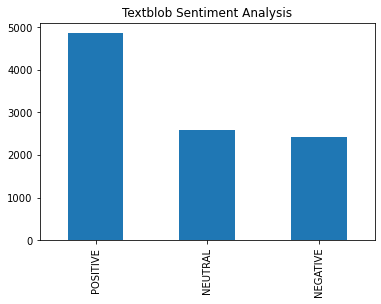

In [26]:
app1_sentiment.Sentiment_Type.value_counts().plot(kind='bar',title="Textblob Sentiment Analysis")

From my tests, VADER seems to work better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage. VADER not only tells the lexicon is positive, negative, or neutral, it also tells how positive, negative, or neutral a sentence is. VADER gave the correct output with some of the problematic sentences and executed. The output brought me to the conclusion that TextBlob was struggling with negative sentences, particularly negations. VADER outperforms TextBlob when it comes to negative polarity detection. We can conclude that VADER does better sentiment analysis when it comes to negative polarity detection. 

## Top 15 frequent words in Reviews 

In [27]:
#how to get the top 100 frequent words on a python dataframe colummn
from collections import Counter
mostCommonWord = Counter(" ".join(app1_sentiment_comparison["Review"]).split()).most_common(15)
df_mostCommonWords = pd.DataFrame(mostCommonWord, columns =['Word', 'Frequency'])
df_mostCommonWords

,Word,Frequency
0,app,3638
1,easy,1966
2,use,1521
3,time,1278
4,work,883
5,canada,844
6,get,676
7,information,567
8,good,552
9,day,550


<AxesSubplot:xlabel='Word'>

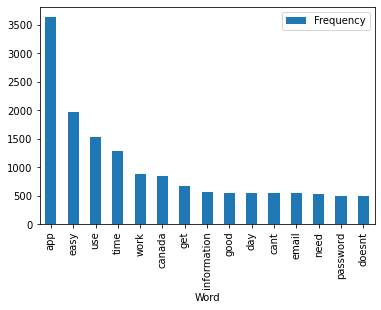

In [28]:
df_mostCommonWords.plot(x ='Word', y='Frequency', kind = 'bar')
